### Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import re #regulat expression, to gind the ecpression and patter from string
import nltk 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
import string
string.punctuation


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Loading data

In [2]:
f = pd.read_csv('train.csv')

In [3]:
f.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
f.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [5]:
f.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Data Cleaning

In [6]:
f = f.drop(['id'], axis = 1)

In [7]:
f.isnull().sum()

label    0
tweet    0
dtype: int64

In [8]:
f.duplicated().sum()

2432

In [9]:
f.shape

(31962, 2)

In [10]:
f = f.drop_duplicates()

### Plotting of target variable

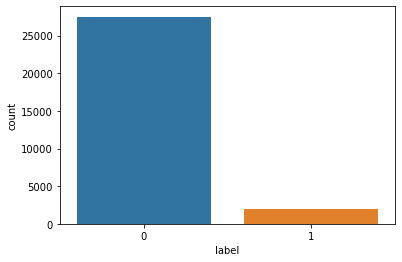

In [11]:
ax = sns.countplot(x='label', data=f) 

### Defining the punctuation removal and Lematization

In [12]:
def message_cleaning(message):
    corpus = [char for char in message if char not in string.punctuation]
    review = ''.join(corpus)
    review = [word for word in review.split() if word.lower() not in stopwords.words('english')]
    return review

In [13]:
f_clean = f['tweet'].apply(message_cleaning)

### Count vectorization of Data

In [14]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(f['tweet']).toarray()

In [15]:
tweets_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
x = tweets_countvectorizer 

In [17]:
y = f['label']

### Modeling the data with Naive Bayes

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [19]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

### Evaluation of the model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

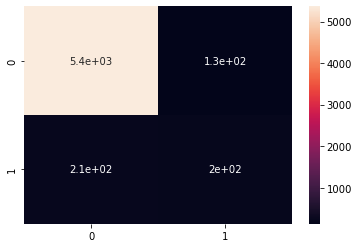

In [21]:
# predicting the test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [22]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5495
           1       0.60      0.48      0.53       411

    accuracy                           0.94      5906
   macro avg       0.78      0.73      0.75      5906
weighted avg       0.94      0.94      0.94      5906



### The End 